# Лабораторная работа 3.2.2 "Резонанс Напряжений"

!!WARNING!!  По описанию с сайта  !!WARNING!!

In [ ]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from math import pi, sqrt
import numpy as np
from IPython.display import display, HTML

Ниже забиваем данные

In [62]:

R = 3.50
U = 0.196
data = pd.DataFrame({
    "C" : [47.6 * 1e-9, 68.0 * 1e-9],
    "f0" : [23.21 * 1e3, 19.35 * 1e3],
    "Vc" : [3.81, 3.20],
    "E" : [0.196, 0.196],
    "L": [0.0, 0.0],
    "Q": [0.0, 0.0],
    "Qadd": [0.0, 0.0],
    "ro": [0.0, 0.0],
    "Rsum": [0.0, 0.0],
    "RSmax": [0.0, 0.0],
    "Rl": [0.0, 0.0],
    "I": [0.0, 0.0]
})

rawDataC5 = pd.DataFrame({
    "f" : [18.78, 18.90, 18.92, 19.00, 19.20, 19.36, 19.50, 19.61, 19.70, 19.87, 20.015, 20.17, 20.30, 20.50],
    "Uc" : [1.96, 2.18, 2.242, 2.43, 2.882, 3.20, 3.25, 3.23, 3.14, 2.86, 2.55, 2.33, 2.02, 1.72]
})

rawDataC3 = pd.DataFrame({
    "f" : [22.38, 22.40, 22.56, 22.62, 22.73, 22.80, 22.90, 22.98, 23.07, 23.11, 23.21, 23.38, 23.56, 23.82, 24.00],
    "Uc" : [2.067, 2.121, 2.420, 2.550, 2.800, 3.016, 3.282, 3.491, 3.67, 3.74, 3.81, 3.71, 3.38, 2.80, 2.47]
})
rawDataFC3 = pd.DataFrame({
    "f" : [21.16, 21.24, 21.28, 22.117, 22.32, 22.80, 23.00, 23.25, 23.50, 23.60, 23.73],
    "fi" : [12/11, 12/11, 12.5/11, 13/10.5, 13/10, 14/10, 15/10, 15.5/10, 16.6/10, 17/10, 17.5/10]
})
rawDataFC5 = pd.DataFrame({
    "f": [18.84, 19.00, 19.20, 19.44, 19.67, 19.95, 20.10, 20.44, 20.60 ],
    "fi": [2/12, 3/12, 3.5/12, 5/12, 6.5/12, 8/12, 9/12, 10/12, 10.5/12]
})


rawDataFC1 = pd.DataFrame({
    "f" : [30.21, 30.36, 30.52, 30.54, 30.82, 31.26, 31.57, 32.03, 32.36, 32.71, 33.36 ],
    "fi" : [9, 9, 9.5, 9.5, 9.5, 10, 10.5, 11.5, 13, 16, 18]
})
rawDataFC1["fi"] =  rawDataFC1["fi"] / 8
rawDataFC2 = pd.DataFrame({
    "f": [26.68, 26.84, 26.95, 27.14, 27.24, 27.35, 27.49, 27.69, 27.96, 28.36],
    "fi": [13, 13, 13.5, 13.5, 14, 14.5, 15.5, 17, 18.5, 21]
})
rawDataFC2["fi"] =  rawDataFC2["fi"] / 10

Распечатываем некоторые таблицы

In [48]:
data["L"] = ( ( 1 / (2 * pi * data["f0"]) )**2) / data["C"]
data["Q"] = data["Vc"] / U
data["ro"] = np.sqrt(data["L"] / data["C"])
data["Rsum"] = data["ro"] / data["Q"]
data["RSmax"] = 1e-3 * data["ro"]
data["Rl"] = data["Rsum"] - data["RSmax"] - R
data["I"] = data["Vc"] / data["Rsum"]
data["Qadd"][1] = 1 /(1.035 - 0.973)
data["Qadd"][0] = 1 /(1.031 - 0.977)
print("Table 1")
display(data)
print("5th Capacitor, voltage, near the resonance")
display(rawDataC5)
print("3th Capacitor, voltage, near the resonance")
display(rawDataC3)
print("5th Capacitor, phase difference, near the resonance")
display(rawDataFC5)
print("3th Capacitor, phase difference, near the resonance")
display(rawDataFC3)

Table 1


,C,f0,Vc,E,L,Q,Qadd,ro,Rsum,RSmax,Rl,I
0,4.760000e-08,23210.0,3.81,0.196,0.000988,19.438776,18.518519,144.058218,7.410869,0.144058,3.766811,0.51411
1,6.800000e-08,19350.0,3.20,0.196,0.000995,16.326531,16.129032,120.956789,7.408603,0.120957,3.787647,0.43193


5th Capacitor, voltage, near the resonance


,f,Uc
0,18.780,1.960
1,18.900,2.180
2,18.920,2.242
3,19.000,2.430
4,19.200,2.882
5,19.360,3.200
6,19.500,3.250
7,19.610,3.230
8,19.700,3.140
9,19.870,2.860


3th Capacitor, voltage, near the resonance


,f,Uc
0,22.38,2.067
1,22.40,2.121
2,22.56,2.420
3,22.62,2.550
4,22.73,2.800
5,22.80,3.016
6,22.90,3.282
7,22.98,3.491
8,23.07,3.670
9,23.11,3.740


5th Capacitor, phase difference, near the resonance


,f,fi
0,0.002541,-1.083333
1,0.002562,-1.000000
2,0.002589,-0.958333
3,0.002622,-0.833333
4,0.002653,-0.708333
5,0.002691,-0.583333
6,0.002711,-0.500000
7,0.002757,-0.416667
8,0.002778,-0.375000


3th Capacitor, phase difference, near the resonance


,f,fi
0,0.000003,-6.159091
1,0.000003,-6.159091
2,0.000003,-6.113636
3,0.000003,-6.011905
4,0.000003,-5.950000
5,0.000003,-5.850000
6,0.000003,-5.750000
7,0.000003,-5.700000
8,0.000003,-5.590000
9,0.000004,-5.550000


Печатаем графики

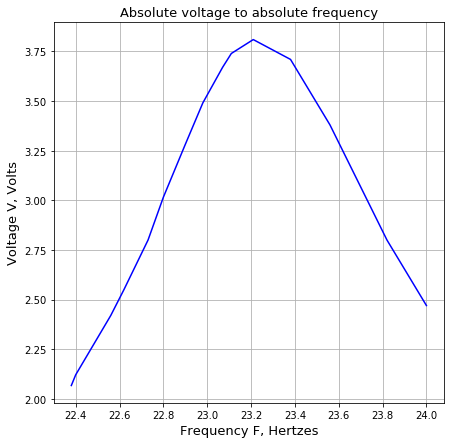

In [5]:
dataC3 = rawDataC3
plt.figure(figsize=(7,7))
plt.plot(dataC3["f"], dataC3["Uc"], color = "blue")
plt.title("Absolute voltage to absolute frequency", fontsize = 13)
plt.ylabel("Voltage V, Volts", fontsize = 13)
plt.xlabel("Frequency F, Hertzes", fontsize = 13)
plt.grid(True)
plt.show()

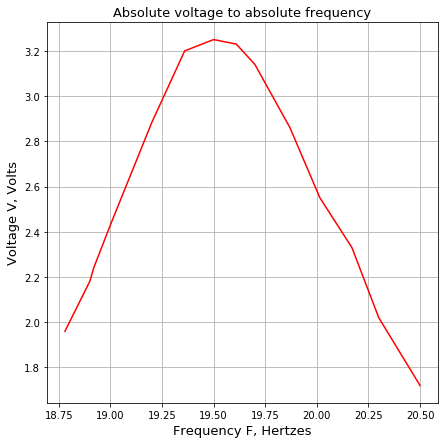

In [6]:
dataC5 = rawDataC5
plt.figure(figsize=(7,7))
plt.plot(dataC5["f"], dataC5["Uc"], color = "red")
plt.title("Absolute voltage to absolute frequency", fontsize = 13)
plt.ylabel("Voltage V, Volts", fontsize = 13)
plt.xlabel("Frequency F, Hertzes", fontsize = 13)
plt.grid(True)
plt.show()

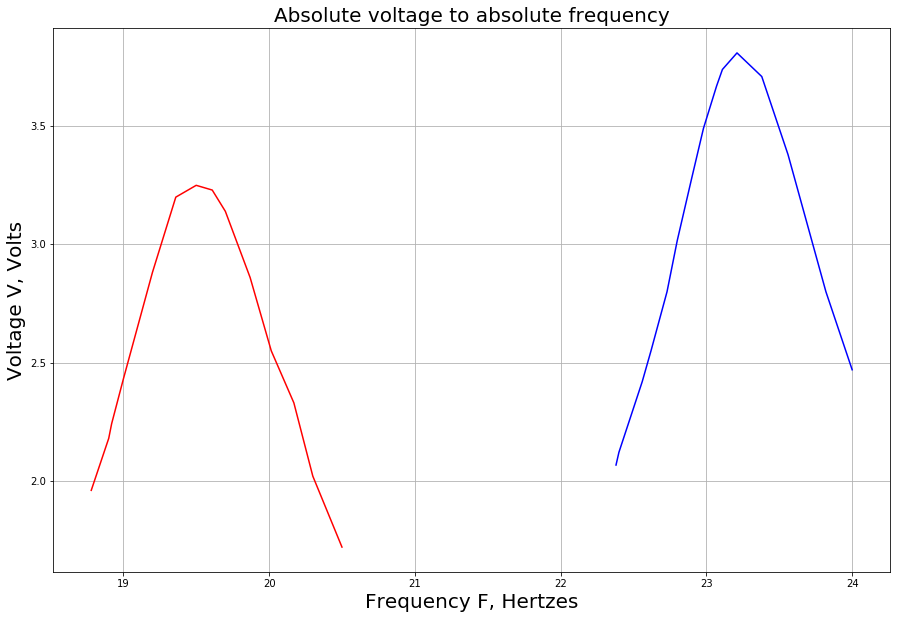

In [7]:
dataC3 = rawDataC3
dataC5 = rawDataC5
plt.figure(figsize=(15,10))
plt.plot(dataC3["f"], dataC3["Uc"], color = "blue")
plt.plot(dataC5["f"], dataC5["Uc"], color = "red")
plt.title("Absolute voltage to absolute frequency", fontsize = 20)
plt.ylabel("Voltage V, Volts", fontsize = 20)
plt.xlabel("Frequency F, Hertzes", fontsize = 20)
plt.grid(True)
plt.show()


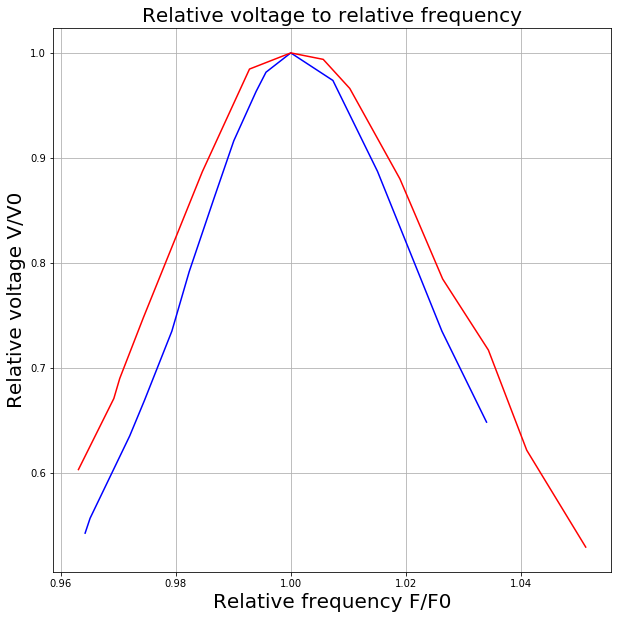

In [8]:

dataC5["f"] = rawDataC5["f"] / 19.50
dataC5["Uc"] = rawDataC5["Uc"] / 3.25
dataC3["f"] = rawDataC3["f"] / 23.21
dataC3["Uc"] = rawDataC3["Uc"] / 3.81


plt.figure(figsize=(10,10))
plt.plot(dataC3["f"], dataC3["Uc"], color = "blue")
plt.plot(dataC5["f"], dataC5["Uc"], color = "red")
plt.title("Relative voltage to relative frequency", fontsize = 20)
plt.ylabel("Relative voltage V/V0", fontsize = 20)
plt.xlabel("Relative frequency F/F0", fontsize = 20)
plt.grid(True)
plt.show()


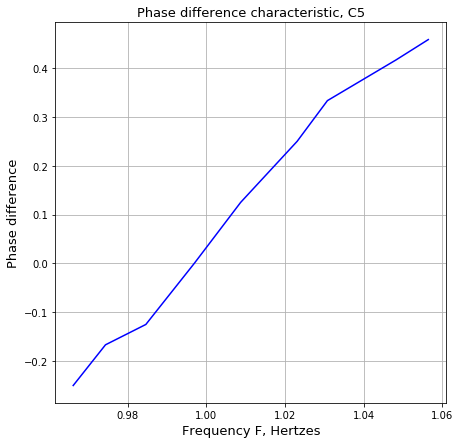

In [60]:
dataFC5 = rawDataFC5
dataFC5["fi"] = dataFC5["fi"] - 5/12
dataFC5["f"] = dataFC5["f"] / 19.50
plt.figure(figsize=(7,7))
plt.plot(dataFC5["f"], dataFC5["fi"], color = "blue")
plt.title("Phase difference characteristic, C5", fontsize = 13)
plt.ylabel("Phase difference", fontsize = 13)
plt.xlabel("Frequency F, Hertzes", fontsize = 13)
plt.grid(True)
plt.show()

In [54]:
regr = linear_model.LinearRegression()
regr.fit(dataFC5["f"][3:7].values.reshape(4,1), dataFC5["fi"][3:7].values.reshape(4,1))
coef = regr.coef_[0][0] / 2
coef

4.8385537509667484

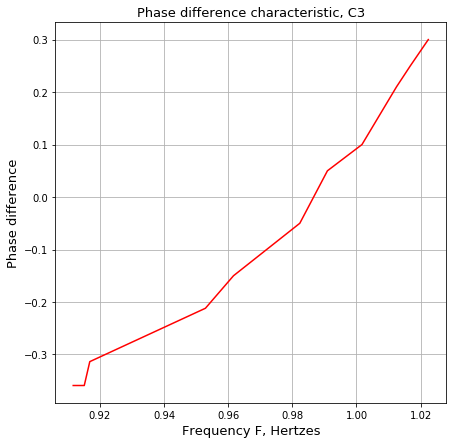

In [64]:
dataFC3 = rawDataFC3
dataFC3["fi"] = dataFC3["fi"] - 14.5/10
dataFC3["f"] = dataFC3["f"] / 23.21

plt.figure(figsize=(7,7))
plt.plot(dataFC3["f"], dataFC3["fi"], color = "red")
plt.title("Phase difference characteristic, C3", fontsize = 13)
plt.ylabel("Phase difference", fontsize = 13)
plt.xlabel("Frequency F, Hertzes", fontsize = 13)
plt.grid(True)
plt.show()

In [69]:
regr = linear_model.LinearRegression()
regr.fit(dataFC3["f"][5:9].values.reshape(4,1), dataFC3["fi"][5:9].values.reshape(4,1))
coef = regr.coef_[0][0] /2
coef

4.081397291196387

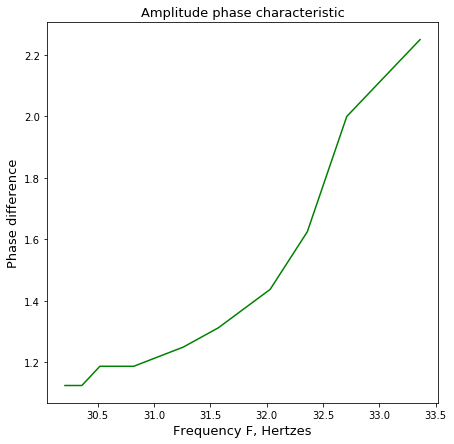

In [72]:
dataFC1 = rawDataFC1
plt.figure(figsize=(7,7))
plt.plot(dataFC1["f"], dataFC1["fi"], color = "green")
plt.title("Amplitude phase characteristic", fontsize = 13)
plt.ylabel("Phase difference", fontsize = 13)
plt.xlabel("Frequency F, Hertzes", fontsize = 13)
plt.show()

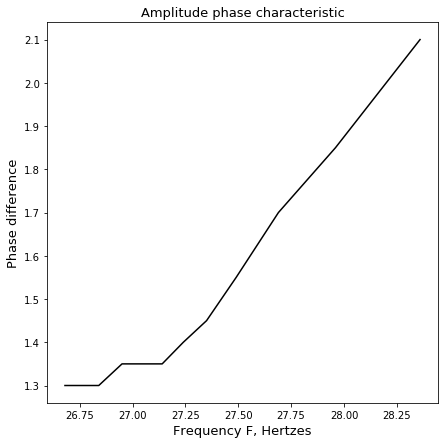

In [74]:
dataFC2 = rawDataFC2
plt.figure(figsize=(7,7))
plt.plot(dataFC2["f"], dataFC2["fi"], color = "black")
plt.title("Amplitude phase characteristic", fontsize = 13)
plt.ylabel("Phase difference", fontsize = 13)
plt.xlabel("Frequency F, Hertzes", fontsize = 13)
plt.show()